# Glucose Control in Patients With Type I Diabetes
$\hspace{10mm}$Lizett Pink, Andrew Spitzer, Travis Tredway & Kyle Vachon

$\hspace{10mm}$Prof. Jeffrey C Kantor

$\hspace{10mm}$University of Notre Dame

$\hspace{10mm}$Department of Chemical and Biomolecular Engineering

$\hspace{10mm}$Chemical Process Control

$\hspace{10mm}$4 May 2017

## Contents

* [1. Problem Statement](#Section00)
* [2. Theoretical Development](#Section01)
     * [A. Governing Equations](#Section02)
     * [B. Block Diagram](#Section03)
     * [C. PID Control](#Section04)
* [3. Positive Disturbance: Exposure to a Meal](#Section05)
     * [A. Initial Conditions - Varied Insulin Input Rate by Controller](#Section06)
     * [B. Closer Look at Ideal Insulin Input Rate](#Section07)
     * [C. Fixed Time Grid Simulation](#Section08)
     * [D. PI Controlled Insulin Input Rate](#Section09)
* [4. Negative Disturbance: Exposure to Exercise](#Section10)
     * [A. Fixed Time Grid Simulation](#Section11)
     * [B. PI Controlled Insulin Input Rate](#Section12)
* [5. Combined Disturbances: Snack, Exercise, Meal](#Section13)
     * [A. Fixed Time Grid Simulation](#Section14)
     * [B. PI Controlled Insulin Input Rate](#Section15)
     * [C. Interactive PID Controlled Simulation](#Section16)
* [6. Conclusion](#Section17)

<a id='Section00'></a>
## 1. Problem Statement

   In healthy individuals, the pancreas serves to regulate the concentration of blood sugar, the body’s main source of energy.  As blood glucose rises, pancreatic $\beta$-cells release insulin which stimulates the uptake of glucose by muscle and fat tissue.  However, in patients with Type I Diabetes, pancreatic $\beta$-cells fail to release insulin upon an increase in blood glucose.  Insufficient secretion of insulin by the pancreas results in large excursions of glucose outside of the body’s target range of 80 - 120 $\frac{mg}{dL}$.  Often, this results in periods of hyperglycemia, or elevated glucose levels.  When in a hyperglycemic state, diabetic patients have an increased risk of developing neuropathy and retinopathy, chronic conditions which can ultimately lead to amputation and blindness, respectively.  Furthermore, as a result of excursions below the target glucose range - caused by not eating or by over-regulating insulin levels, for example - the body can enter a state of hypoglycemia.  In severe cases, this condition can cause seizures and ultimately death.  

   The main disturbances to glucose levels within the body include the consumption of food and periods of increased physical activity.  Since college students are constantly exposed to factors which may cause their blood sugar to deviate from a healthy, steady-state value, implementing a control mechanism which is able to effectively monitor and regulate insulin levels within the body is of extreme importance.  In what follows, Bergman’s Minimal Model, a simple mathematical model which represents the uptake of glucose by the body in a patient with Type II Diabetes, is modified to describe the glucose and insulin levels of a patient with Type I Diabetes.  This modified model is then used to perform a series of simulations, both in the absence and presence of a P/I controller, to determine effective control constants.  Ultimately, the simulations conducted below illustrate that P/I control is effective at regulating the level of insulin within the body of patient with Type I Diabetes. 


<a id='Section01'></a>
## 2. Theoretical Development

<a id='Section02'></a>
#### 2.A. Governing Equations

<a id='Section03'></a>
#### 2.B. Block Diagram

<a id='Section04'></a>
#### 2.C. Implementing PID Control

<a id='Section05'></a>
## 3. Positive Disturbance: Exposure to a Meal

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Define Parameters 
p1 = 0.028735 # 1/min
p2 = 0.028344 # 1/min
p3 = 0.00005035 # L/min^2/mU
p4 = 0.3 # 1/min
u = 10 # mU/L/min
drate = 0.1

# Define Initial Conditions
Gb = 81 # mg/dL
Ib = 15 # mU/L
X0 = 0 # mU/L
D0 = 5

# Define Optimal Glucose Conditions
SetG = 100 # mg/dL
Gmax = 120 # mg/dL
Gmin = 80 # mg/dL
Ghypo = 45 # mg/dL
Ghyper = 300 # mg/dL

# Define Governing Equations
def D(t):
    return D0*np.exp(-drate*t)
def deriv(Y,t):
    G,X,I = Y
    dG = -(p1+X)*G + p1*Gb + D(t)
    dX = -p2*X + p3*(I-Ib)
    dI = -p4*I + u
    return [dG,dX,dI]

In [2]:
# Create Plot to Illustrate Glucose and Insulin Levels
def plotInsulin(t,Y):
    plt.subplot(1,2,1)
    plt.plot(t,Y[:,0])
    plt.xlabel('Time [mins]')
    plt.ylabel('Concentration [mg/dL]')
    plt.title('Glucose Level')
    plt.plot(plt.xlim(),[SetG,SetG],'k:')
    plt.plot(plt.xlim(),[Gmin,Gmin],'b:')
    plt.plot(plt.xlim(),[Gmax,Gmax],'b:')
    plt.plot(plt.xlim(),[Ghypo,Ghypo],'r:')
    plt.plot(plt.xlim(),[Ghyper,Ghyper],'y:')

    plt.subplot(1,2,2)
    plt.plot(t,Y[:,2])
    plt.xlabel('Time [mins]')
    plt.ylabel('Concentration [mU/L]');
    plt.title('Insulin Level')

<a id='Section06'></a>
#### 3.A. Initial Conditions - Varied Insulin Input Rate by Controller

The following simulation varies the amount of insulin released per unit time by the controller to determine the optimal controller response to a meal disturbance.  The meal disturbance is provided at t = 0 minutes.  The simulation is carried out over the period of one full day, or 1440 minutes.  The patient is at the following initial conditions:
- Basal Glucose Level: 81 $\frac{mg}{dL}$
- Active Insulin Level: 0 $\frac{mU}{dL}$
- Basal Insulin Level: 15 $\frac{mU}{dL}$

It is important to note that the ideal glucose range, as defined above, has been highlighted on the plot of the patient's Glucose Level using a series of blue dotted lines.  In a similar fashion, the point at which the patient enters a state of hypoglycemia (~ 45 $\frac{mg}{dL}$) is illustrated using a red dotted line, while the point at which the patient begins experiencing hyperglycemic effects (~300 $\frac{mg}{dL}$) is shown using a yellow dotted line.  The set point of glucose in this simulation is 100 $\frac{mg}{dL}$, shown on the figure as the black dotted line.

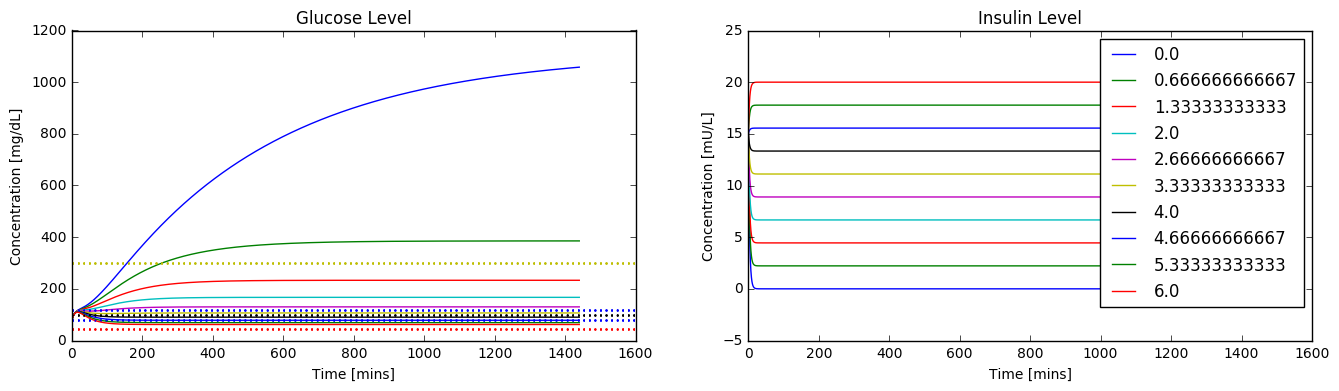

In [3]:
IC = [Gb,X0,Ib]                     # initial condition
t = np.linspace(0,1440,2000)        # simulation time grid

uList = np.linspace(0,6,10)

plt.figure(figsize=(16,4))          # setup figure 
for u in uList:                     # for each insulin input rate
    Y = odeint(deriv,IC,t)          # perform simulation
    plotInsulin(t,Y)                # plot the results
    
plt.legend(uList)

Looking to the above simulation, the figure on the left illustrates the glucose level of the patient after being exposed to a meal.  The different lines represent different amounts of insulin being excreted by the controller to maintain the glucose level of the patient within an optimal range.  On the right is a plot of the concentration of insulin present in the patient.  The legend offers a rough measure of the amount of control being implemented - high values correspond to large insulin input rates and therefore large amounts of control, whereas low values correspond to little to no control.

As can be seen, when no control is implemented, the patient enters a hyperglycemic state.  When too much control is provided, the glucose concentration of the patient drops below the optimal range.  In order to better visualize how much insulin should be input per unit time by the controller, the above plot is recreated using a smaller control range.

<a id='Section07'></a>
#### 3.B. Closer Look at Ideal Insulin Input Rate

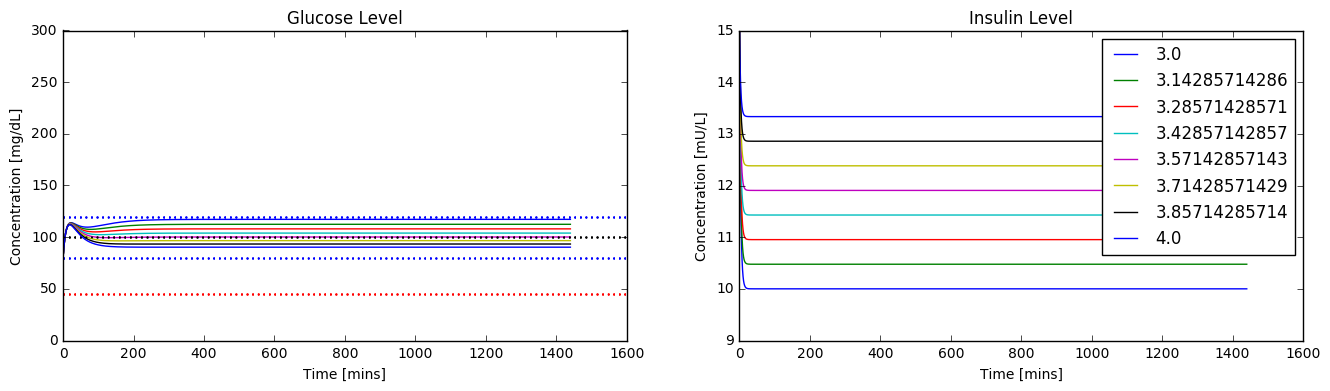

In [4]:
IC = [Gb,X0,Ib]                          # initial condition
t = np.linspace(0,1440,2000)             # simulation time grid

uList = np.linspace(3,4,8)

plt.figure(figsize=(16,4))              # setup figure 
for u in uList:                         # for each insulin input rate
    Y = odeint(deriv,IC,t)              # perform simulation
    plotInsulin(t,Y)                    # plot the results
    
plt.legend(uList)

Using this smaller control range, the glucose level of the patient has been contained within the ideal limits of 80 - 120 $\frac{mg}{dL}$.  From here, the insulin input rate which keeps the patient's glucose level most near the set point is determined to have a value of approximately 3.58 $\frac{mU}{L.min}$.  This value will be used in subsequent simulations.

<a id='Section08'></a>
#### 3.C. Fixed Time Grid Simulation

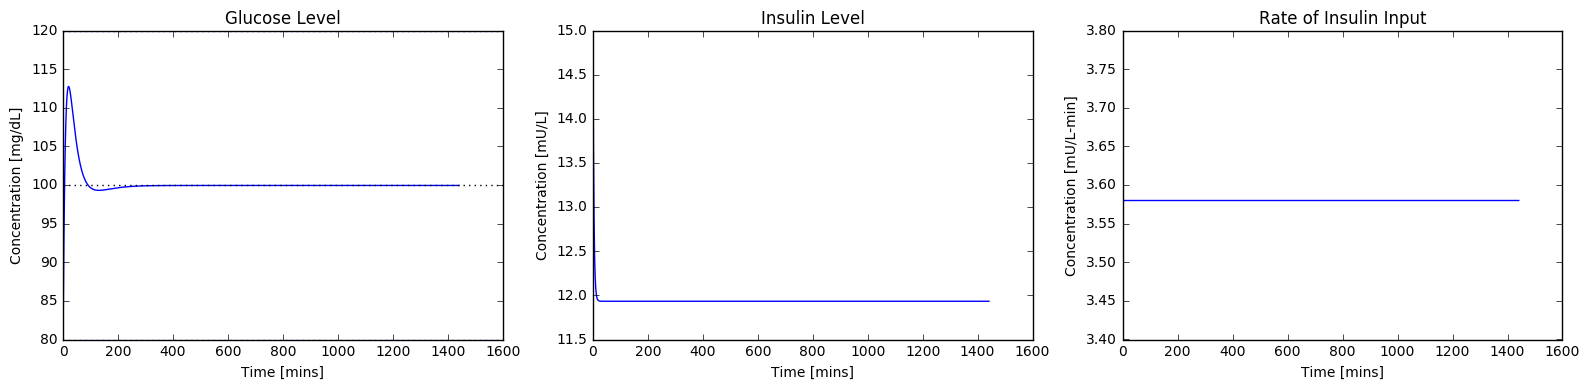

In [5]:
### Set initial conditions 
IC = [Gb,X0,Ib]

# Conduct simulation at fixed time steps dt
dt = 1
ti = 0
tf = 1441

# create a list to log results
log = []

# Start simulation
G,X,I = IC
u = 3.58  # mU/L/min
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,G,X,I,u])                      # log data for later plotting
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]   # start at t, find state at t + dt

def iplot(log):
    log = np.asarray(log).T
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    plt.plot(log[0],log[1])
    if 'SetG' in globals():
        plt.plot(plt.xlim(),[SetG,SetG],'k:')
        plt.plot(plt.xlim(),[Gmax,Gmax],'b:')
        plt.plot(plt.xlim(),[Gmin,Gmin],'b:')
    plt.title('Glucose Level')
    plt.ylabel('Concentration [mg/dL]')
    plt.xlabel('Time [mins]')
    
    plt.subplot(1,3,2)
    plt.plot(log[0],log[3])
    plt.title('Insulin Level')
    plt.ylabel('Concentration [mU/L]')
    plt.xlabel('Time [mins]')

    plt.subplot(1,3,3)
    plt.plot(log[0],log[4])
    plt.title('Rate of Insulin Input')
    plt.ylabel('Concentration [mU/L-min]')
    plt.xlabel('Time [mins]')
    plt.tight_layout()

SS = log[-1]
iplot(log)

<a id='Section09'></a>
#### 3.D. PI Controlled Insulin Input Rate

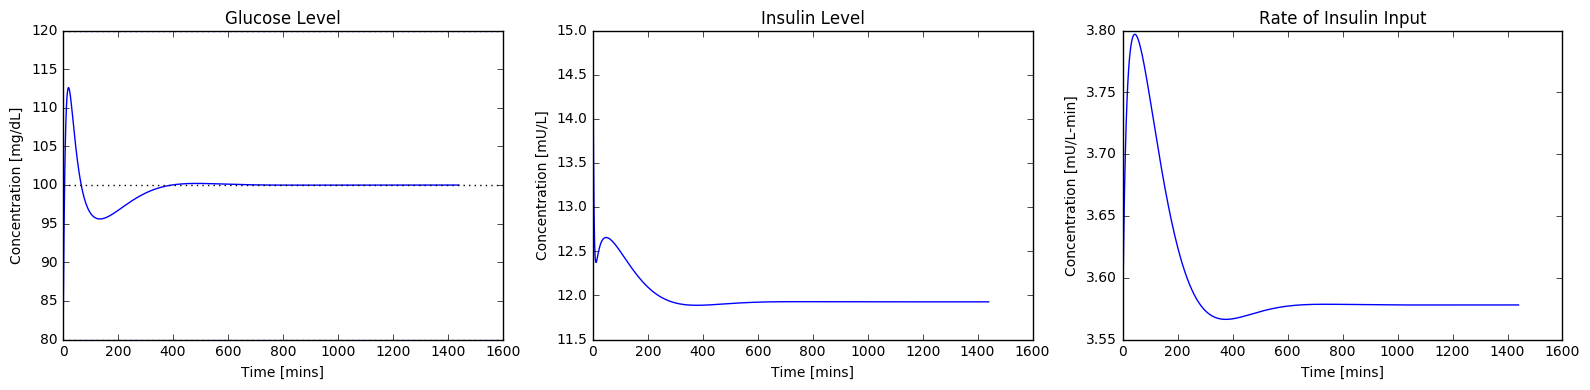

In [6]:
# Define setpoint
Gsp = SetG

# set initial conditions
IC = [Gb,X0,Ib,3.58]

# do simulation at fixed time steps dt
dt = 1.0
ti = 0.0
tf = 1440.0

# control saturation
u_min = 0                            # minimum possible insulin input rate
u_max = 900                          # maximum possible insulin output rate
def sat(u):                          # function to return feasible value of u
    return max(u_min,min(u_max,u))

# control parameters
kp = 0.005
ki = 0.0003
kd = 0
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
G,X,I,u = IC

eP_ = beta*Gsp - G
eD_ = gamma*Gsp - G
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Gsp - G
    eI = Gsp - G
    eD = gamma*Gsp - G
    u -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    u = sat(u)
    
    # log data and update state
    log.append([t,G,X,I,u])
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

iplot(log)

As the above simulation shows - immediately after consuming a meal, the patient's glucose level spikes to a maximum value of ~ 112 $\frac{mg}{dL}$.  In response, the controller ramps up the rate at which insulin is being input into the body.  Eventually, once the patient's body reaches steady-state level of glucose, the rate of insulin input returns to the nominal value of 3.58 $\frac{mU}{L.min}$.  The simulation suggests that the time required for the patient's glucose and insulin levels to approach a steady-state is ~400 minutes, or roughly 6.7 hours.

<a id='Section10'></a>
## 4. Negative Disturbance: Exposure to Exercise
In this simulation we assume the same insulin input rate as utilized before.

In [7]:
# Define exercise disturbance function
D0ex = -7
def D(t):
    return D0ex*np.exp(-drate*t)

<a id='Section11'></a>
#### 4.A. Fixed Time Grid Simulation

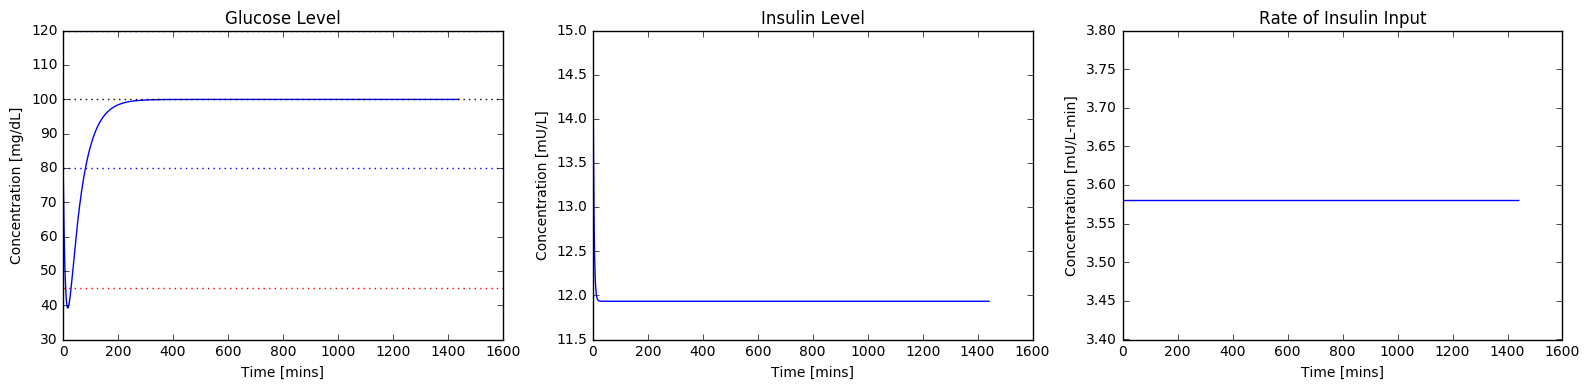

In [8]:
### Set initial conditions 
IC = [Gb,X0,Ib]

# Conduct simulation at fixed time steps dt
dt = 1
ti = 0
tf = 1441

# create a list to log results
log = []

# Start simulation
G,X,I = IC
u = 3.58  # mU/L/min
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,G,X,I,u])                      # log data for later plotting
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]   # start at t, find state at t + dt

def iplot(log):
    log = np.asarray(log).T
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    plt.plot(log[0],log[1])
    if 'SetG' in globals():
        plt.plot(plt.xlim(),[SetG,SetG],'k:')
        plt.plot(plt.xlim(),[Ghypo,Ghypo],'r:')
        plt.plot(plt.xlim(),[Gmax,Gmax],'b:')
        plt.plot(plt.xlim(),[Gmin,Gmin],'b:')
    plt.title('Glucose Level')
    plt.ylabel('Concentration [mg/dL]')
    plt.xlabel('Time [mins]')
    
    plt.subplot(1,3,2)
    plt.plot(log[0],log[3])
    plt.title('Insulin Level')
    plt.ylabel('Concentration [mU/L]')
    plt.xlabel('Time [mins]')

    plt.subplot(1,3,3)
    plt.plot(log[0],log[4])
    plt.title('Rate of Insulin Input')
    plt.ylabel('Concentration [mU/L-min]')
    plt.xlabel('Time [mins]')
    plt.tight_layout()

SS = log[-1]
iplot(log)

<a id='Section12'></a>
#### 4.B. PI Controlled Insulin Input Rate

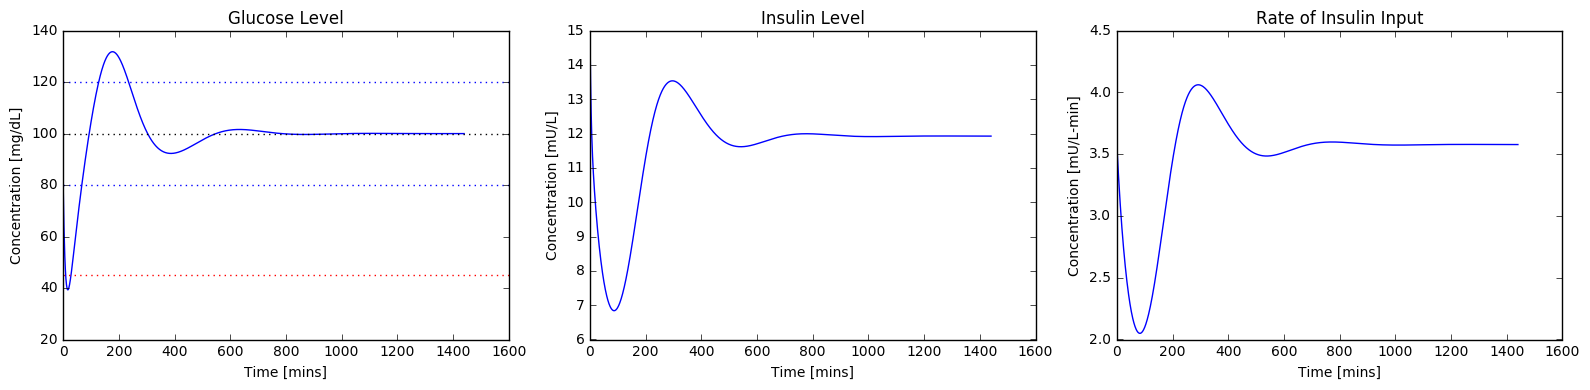

In [9]:
# Define setpoint
Gsp = SetG

# set initial conditions
IC = [Gb,X0,Ib,3.58]

# do simulation at fixed time steps dt
dt = 1.0
ti = 0.0
tf = 1440.0

# control saturation
u_min = 0                            # minimum possible insulin input rate
u_max = 900                          # maximum possible insulin output rate
def sat(u):                          # function to return feasible value of u
    return max(u_min,min(u_max,u))

# control parameters
kp = 0.005
ki = 0.0005
kd = 0
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
G,X,I,u = IC

eP_ = beta*Gsp - G
eD_ = gamma*Gsp - G
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Gsp - G
    eI = Gsp - G
    eD = gamma*Gsp - G
    u -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    u = sat(u)
    
    # log data and update state
    log.append([t,G,X,I,u])
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

iplot(log)

^^ In this simulation - we can see that glucose level goes into the hypoglycemic region - dangerous for patient.  To control this, the rate of insulin input decreases - as opposed to increasing upon the consumption of a meal.  It's important to note that the response of the simulation depends upon the magnitude of the exercise disturbance, defined in this simulation as the magnitude of "$D_0$"

<a id='Section13'></a>
## 5. Combined Disturbances: Snack, Exercise, Meal
Here, a snack is administered at hour 0, exercise at hour 6, and the meal at hour 12.

In [10]:
# Define combined disturbance function
D0snack = 3
D0ex = -7
D0meal = 5
D0 = [D0snack,D0ex,D0meal]

t1 = 6*60
t2 = 12*60
t3 = 18*60
tmax = 24*60

t = 0.0
for t in range(0,tmax):
    def D(t):
        if t < t1:
            return D0[0]*np.exp(-drate*t)
        elif t < t2:
            return D0[1]*np.exp(-drate*(t-t1))
        else:
            return D0[2]*np.exp(-drate*(t-t2))

<a id='Section14'></a>
#### 5.A. Fixed Time Grid Simulation

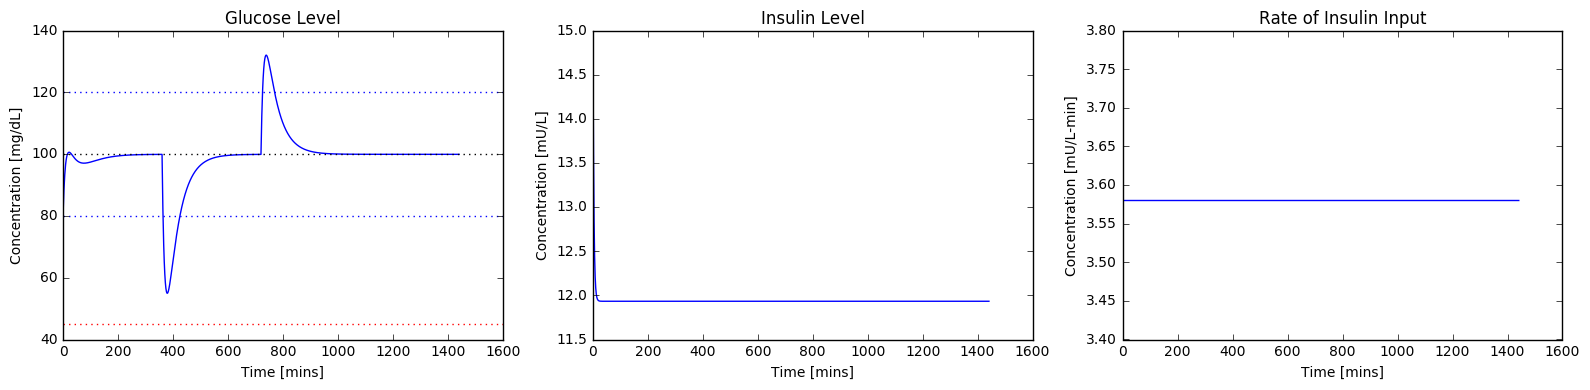

In [11]:
### Set initial conditions 
IC = [Gb,X0,Ib]

# Conduct simulation at fixed time steps dt
dt = 1
ti = 0
tf = 1441

# create a list to log results
log = []

# Start simulation
G,X,I = IC
u = 3.58  # mU/L/min
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,G,X,I,u])                      # log data for later plotting
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]   # start at t, find state at t + dt

def iplot(log):
    log = np.asarray(log).T
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    plt.plot(log[0],log[1])
    if 'SetG' in globals():
        plt.plot(plt.xlim(),[SetG,SetG],'k:')
        plt.plot(plt.xlim(),[Ghypo,Ghypo],'r:')
        plt.plot(plt.xlim(),[Gmax,Gmax],'b:')
        plt.plot(plt.xlim(),[Gmin,Gmin],'b:')
    plt.title('Glucose Level')
    plt.ylabel('Concentration [mg/dL]')
    plt.xlabel('Time [mins]')
    
    plt.subplot(1,3,2)
    plt.plot(log[0],log[3])
    plt.title('Insulin Level')
    plt.ylabel('Concentration [mU/L]')
    plt.xlabel('Time [mins]')

    plt.subplot(1,3,3)
    plt.plot(log[0],log[4])
    plt.title('Rate of Insulin Input')
    plt.ylabel('Concentration [mU/L-min]')
    plt.xlabel('Time [mins]')
    plt.tight_layout()

SS = log[-1]
iplot(log)

Glucose initially increased to set point level after the consumption of the meal - only slight overshoot.  Exercise causes large negative disturbance, whereas meal causes large positive disturbance.  Though we remain above the hypoglycemic range, implementing variable insulin input control may allow the patient to keep glucose levels within the ideal range of 80-120.

<a id='Section15'></a>
#### 5.B. PI Controlled Insulin Input Rate

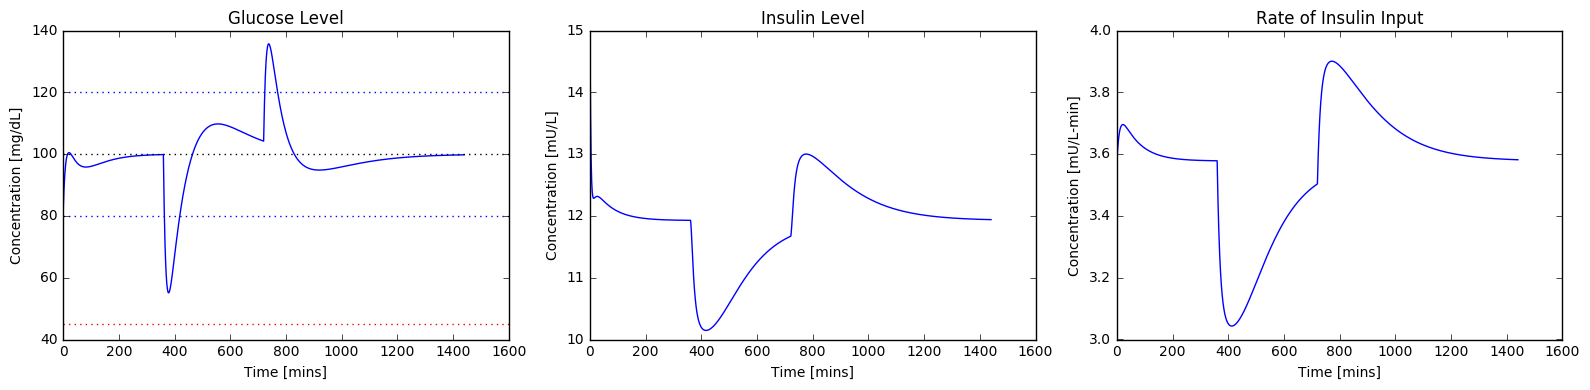

In [12]:
# Define setpoint
Gsp = SetG

# set initial conditions
IC = [Gb,X0,Ib,3.58]

# do simulation at fixed time steps dt
dt = 1.0
ti = 0.0
tf = 1440.0

# control saturation
u_min = 0                            # minimum possible insulin input rate
u_max = 900                          # maximum possible insulin output rate
def sat(u):                          # function to return feasible value of u
    return max(u_min,min(u_max,u))

# control parameters
kp = 0.007
ki = 0.0002
kd = 0
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
G,X,I,u = IC

eP_ = beta*Gsp - G
eD_ = gamma*Gsp - G
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Gsp - G
    eI = Gsp - G
    eD = gamma*Gsp - G
    u -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    u = sat(u)
    
    # log data and update state
    log.append([t,G,X,I,u])
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

iplot(log)

Though we weren't able to keep patients glucose level within the ideal range, we were able to minimize the time spent outside of the ideal range using PI control.  Adding derivative control to the controller may help.

<a id='Section16'></a>
#### 5.C. Interactive PID Control Simulation 

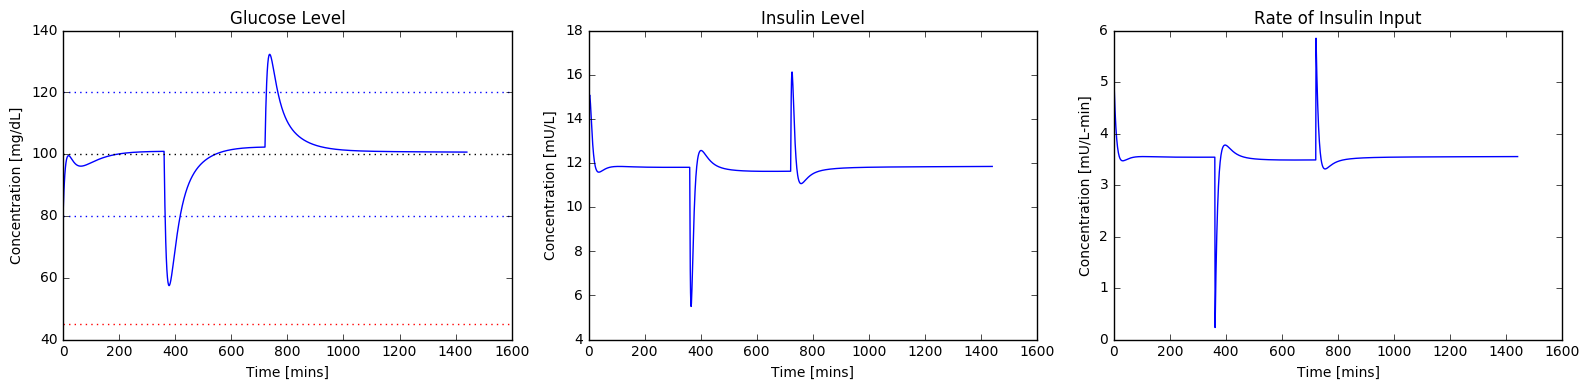

In [13]:
from ipywidgets import interact

IC = [Gb,X0,Ib]

def sim(Gsetpoint,kpmult,kimult,kdmult):
    global Gsp, u
    Gsp = Gsetpoint
    kp = 0.00005
    ki = 0.0000005
    kd = .01
    # control parameters
    beta = 0
    gamma = 0

    # create python list to log results
    log = []

    # start simulation
    G,X,I = IC
    u = 3.5

    eP_ = beta*Gsp - G
    eD_ = gamma*Gsp - G
    eD__ = eD_

    for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
        # PID control calculations
        eP = beta*Gsp - G
        eI = Gsp - G
        eD = gamma*Gsp - G
        u -= kpmult*kp*(eP - eP_) + kimult*ki*dt*eI + kdmult*kd*(eD - 2*eD_ + eD__)/dt
        u = sat(u)

        # log data and update state
        log.append([t,G,X,I,u])
        G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
        # save data for PID calculations
        eD__ = eD_
        eD_ = eD
        eP_ = eP

    iplot(log)
    
interact(sim,Gsetpoint = (80.0,120.0,1),kpmult =(0,100,1), kimult=(0,100,1), kdmult=(0,100,1));

<a id='Section17'></a>
## 6. Conclusion

Our artificial pancreas model is able to successfully correct for both positive disturbances to blood glucose levels, such as food intake, and negative disturbances, such as exercise. It does so by adjusting the amount of insulin taken in: The input increases with a positive disturbance, and either decreases or shuts off completely with a negative disturbance. 

The control constants allow glucose levels to be maintained in a safe range of above 45 $\frac{mg}{dL}$ at all times to avoid immediately harmful hypoglycemia, below 300 $\frac{mg}{dL}$ to avoid hyperglycemia and the long-term health issues that accompany it, a tolerable range displayed between 80 and 120 $\frac{mg}{dL}$, and a setpoint of 100 $\frac{mg}{dL}$.

In practice, the control constants will vary from person to person due to variance in their eating habits and/or metabolic rates. However, they could be calibrated after observing the patient’s blood glucose levels and corresponding activities and disturbances. This can be found and adjusted using our interactive model, which allows for adjustment of the control parameters. Once the disturbances are changed in the code, the control parameters can be changed and visual feedback of glucose and insulin input levels will be given. With the setpoint and safe range displayed as well, an optimal group of constants can be determined manually. 
